In [114]:
# Importando algunas librerias

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from os import path
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string

In [115]:
pd.set_option('display.max_colwidth', 3000)
pd.options.display.max_rows=300

In [116]:
df = pd.read_csv('Total___of_classes_20240614.csv', usecols=['Major', 'Course Title', 'Course Description'])
df['ID'] = range(1, len(df) + 1)
df

,Major,Course Title,Course Description,ID
0,Business/Admin./Mgmt.,INTRODUCTION TO BUSINESS,"An introductory course designed to survey the field of business and its environment in order to give the student a broad overview of the principles, practices, institutions, and functions of business.",1
1,Business/Admin./Mgmt.,MA 160,"A general calculus course primarily for business students. Topics include algebraic, exponential, and logarithmic functions and their graphs; an intuitive approach to limits; differentiation; integration; and functions of several variables. Major emphasis",2
2,Business/Admin./Mgmt.,INTRO TO AMERICAN MUSIC,A survey of American popular music from the turn of the 20th century to the present with an emphasis on rock music.,3
3,Business/Admin./Mgmt.,PUBLIC POLICY ANALYSIS,"Focus is on the analysis of costs and benefits in the selection of the public policy choices. Students analyze public policy alternatives, factors, and process involved in policy development, including the rulemaking that occurs after legislative enactmen",4
4,Other/Misc.,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organization and delivery of \nthe United States health care system is studied. Concepts and \napplications of the system are explored as well as comparisons with international health care paradigms. Introduction to the s",5
...,...,...,...,...
4363,Political Science,POL 101 AMERICAN GOVERMENT,"Structure, powers, and processes of the American political system: executive, legislative, and judicial branches; civil liberties, federalism, democratic patterns and backgrounds, public opinion, pressure group politics, political parties, constitutional mechanisms, and administrative establishment; foreign and domestic policy. Emphasis on national level.",4364
4364,NaN,FIREGROUND SURVIVAL & RIT,Fire Combat,4365
4365,Information Technology,UNIX/LINUX SYSTEM ADMINISTRATION,"These are Saturday classes.\n\nIntroduction to concepts, procedures, tasks, and utilities of UNIX/LINUX system administration. Topics include UNIX/LINUX system architecture, user administration, process management, software installation and management, hierarchy, creation, and management of file systems, device configuration and management, as well as networking fundamentals. PREREQUISITE(S): CMSC 110 or NWIT 127, or consent of department. Four hours each week. Formerly CS 253.\n\n4 semester hours \n\nCourse Outcomes:\nUpon course completion, a student will be able to:\nInstall UNIX/LINUX operating system\nConfigure UNIX/LINUX kernel\nDescribe UNIX/LINUX system architecture\nDescribe the administrative tasks of the OS\nUtilize system utilities to perform administrative tasks\nRun and configure essential system processes\nDescribe the file system hiearchy\nCreate and maintain file systems\nPerform backup and recovery\nCreate and maintain users and groups\nInstall and configure application software\nManage and configure devices\nInstall and configure network components",4366
4366,Other/Misc.,RDS HANDGUN INSTRUCTOR,RDS Handgun Instructor for LEO only,4367


Este dataset contiene una lista de asignaturas de diferentes carreras y diferentes universidades de Estados Unidos.

## Limpieza

In [117]:
df['Course Description_Clean'] = df['Course Description'].str.replace('\r?\n|\r',' ', regex=True)
df

,Major,Course Title,Course Description,ID,Course Description_Clean
0,Business/Admin./Mgmt.,INTRODUCTION TO BUSINESS,"An introductory course designed to survey the field of business and its environment in order to give the student a broad overview of the principles, practices, institutions, and functions of business.",1,"An introductory course designed to survey the field of business and its environment in order to give the student a broad overview of the principles, practices, institutions, and functions of business."
1,Business/Admin./Mgmt.,MA 160,"A general calculus course primarily for business students. Topics include algebraic, exponential, and logarithmic functions and their graphs; an intuitive approach to limits; differentiation; integration; and functions of several variables. Major emphasis",2,"A general calculus course primarily for business students. Topics include algebraic, exponential, and logarithmic functions and their graphs; an intuitive approach to limits; differentiation; integration; and functions of several variables. Major emphasis"
2,Business/Admin./Mgmt.,INTRO TO AMERICAN MUSIC,A survey of American popular music from the turn of the 20th century to the present with an emphasis on rock music.,3,A survey of American popular music from the turn of the 20th century to the present with an emphasis on rock music.
3,Business/Admin./Mgmt.,PUBLIC POLICY ANALYSIS,"Focus is on the analysis of costs and benefits in the selection of the public policy choices. Students analyze public policy alternatives, factors, and process involved in policy development, including the rulemaking that occurs after legislative enactmen",4,"Focus is on the analysis of costs and benefits in the selection of the public policy choices. Students analyze public policy alternatives, factors, and process involved in policy development, including the rulemaking that occurs after legislative enactmen"
4,Other/Misc.,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,"The historical, current, and future organization and delivery of \nthe United States health care system is studied. Concepts and \napplications of the system are explored as well as comparisons with international health care paradigms. Introduction to the s",5,"The historical, current, and future organization and delivery of the United States health care system is studied. Concepts and applications of the system are explored as well as comparisons with international health care paradigms. Introduction to the s"
...,...,...,...,...,...
4363,Political Science,POL 101 AMERICAN GOVERMENT,"Structure, powers, and processes of the American political system: executive, legislative, and judicial branches; civil liberties, federalism, democratic patterns and backgrounds, public opinion, pressure group politics, political parties, constitutional mechanisms, and administrative establishment; foreign and domestic policy. Emphasis on national level.",4364,"Structure, powers, and processes of the American political system: executive, legislative, and judicial branches; civil liberties, federalism, democratic patterns and backgrounds, public opinion, pressure group politics, political parties, constitutional mechanisms, and administrative establishment; foreign and domestic policy. Emphasis on national level."
4364,NaN,FIREGROUND SURVIVAL & RIT,Fire Combat,4365,Fire Combat
4365,Information Technology,UNIX/LINUX SYSTEM ADMINISTRATION,"These are Saturday classes.\n\nIntroduction to concepts, procedures, tasks, and utilities of UNIX/LINUX system administration. Topics include UNIX/LINUX system architecture, user administration, process management, software installation and management, hierarchy, creation, and management of file systems, device configuration and management, as well as networking fundamentals. PREREQUISITE(S): CMSC 110 or NWIT 127, or consent of department. Four hours each week. Formerly CS 253.\n\n4 semester hours \n\nCourse Outcomes:\nUpon course completion, a student will be able to:\nIns

In [118]:
df = df.drop(columns=['Course Description'])
df

,Major,Course Title,ID,Course Description_Clean
0,Business/Admin./Mgmt.,INTRODUCTION TO BUSINESS,1,"An introductory course designed to survey the field of business and its environment in order to give the student a broad overview of the principles, practices, institutions, and functions of business."
1,Business/Admin./Mgmt.,MA 160,2,"A general calculus course primarily for business students. Topics include algebraic, exponential, and logarithmic functions and their graphs; an intuitive approach to limits; differentiation; integration; and functions of several variables. Major emphasis"
2,Business/Admin./Mgmt.,INTRO TO AMERICAN MUSIC,3,A survey of American popular music from the turn of the 20th century to the present with an emphasis on rock music.
3,Business/Admin./Mgmt.,PUBLIC POLICY ANALYSIS,4,"Focus is on the analysis of costs and benefits in the selection of the public policy choices. Students analyze public policy alternatives, factors, and process involved in policy development, including the rulemaking that occurs after legislative enactmen"
4,Other/Misc.,MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,5,"The historical, current, and future organization and delivery of the United States health care system is studied. Concepts and applications of the system are explored as well as comparisons with international health care paradigms. Introduction to the s"
...,...,...,...,...
4363,Political Science,POL 101 AMERICAN GOVERMENT,4364,"Structure, powers, and processes of the American political system: executive, legislative, and judicial branches; civil liberties, federalism, democratic patterns and backgrounds, public opinion, pressure group politics, political parties, constitutional mechanisms, and administrative establishment; foreign and domestic policy. Emphasis on national level."
4364,NaN,FIREGROUND SURVIVAL & RIT,4365,Fire Combat
4365,Information Technology,UNIX/LINUX SYSTEM ADMINISTRATION,4366,"These are Saturday classes. Introduction to concepts, procedures, tasks, and utilities of UNIX/LINUX system administration. Topics include UNIX/LINUX system architecture, user administration, process management, software installation and management, hierarchy, creation, and management of file systems, device configuration and management, as well as networking fundamentals. PREREQUISITE(S): CMSC 110 or NWIT 127, or consent of department. Four hours each week. Formerly CS 253. 4 semester hours Course Outcomes: Upon course completion, a student will be able to: Install UNIX/LINUX operating system Configure UNIX/LINUX kernel Describe UNIX/LINUX system architecture Describe the administrative tasks of the OS Utilize system utilities to perform administrative tasks Run and configure essential system processes Describe the file system hiearchy Create and maintain file systems Perform backup and recovery Create and maintain users and groups Install and configure application software Manage and configure devices Install and configure network components"
4366,Other/Misc.,RDS HANDGUN INSTRUCTOR,4367,RDS Handgun Instructor for LEO only


In [119]:
# función para limpiar texto
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.replace(",", "")
    text = text.replace(".", "")
    text = text.replace("-", "")
    text = text.replace("¡", "")
    text = text.replace("!", "")
    text = text.replace('"', "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace(";", "")
    text = text.replace(";", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("¿", "")
    text = text.replace("?", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("'", "")
    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [120]:
df['Course Description_Clean'] = df['Course Description_Clean'].astype('str').apply(clean_text)

In [121]:
df['Major'] = df['Major'].astype('str').apply(clean_text)

In [122]:
df['Course Title'] = df['Course Title'].astype('str').apply(clean_text)

In [123]:
df

,Major,Course Title,ID,Course Description_Clean
0,business/admin/mgmt,introduction business,1,introductory course designed survey field business environment order give student broad overview principles practices institutions functions business
1,business/admin/mgmt,160,2,general calculus course primarily business students topics include algebraic exponential logarithmic functions graphs intuitive approach limits differentiation integration functions several variables major emphasis
2,business/admin/mgmt,intro american music,3,survey american popular music turn 20th century present emphasis rock music
3,business/admin/mgmt,public policy analysis,4,focus analysis costs benefits selection public policy choices students analyze public policy alternatives factors process involved policy development including rulemaking occurs legislative enactmen
4,other/misc,mha 500 contemporary issues health care,5,historical current future organization delivery united states health care system studied concepts applications system explored well comparisons international health care paradigms introduction
...,...,...,...,...
4363,political science,pol 101 american goverment,4364,structure powers processes american political system : executive legislative judicial branches civil liberties federalism democratic patterns backgrounds public opinion pressure group politics political parties constitutional mechanisms administrative establishment foreign domestic policy emphasis national level
4364,nan,fireground survival & rit,4365,fire combat
4365,information technology,unix/linux system administration,4366,saturday classes introduction concepts procedures tasks utilities unix/linux system administration topics include unix/linux system architecture user administration process management software installation management hierarchy creation management file systems device configuration management well networking fundamentals prerequisites : cmsc 110 nwit 127 consent department four hours week formerly cs 253 4 semester hours course outcomes : upon course completion student able : install unix/linux operating system configure unix/linux kernel describe unix/linux system architecture describe administrative tasks os utilize system utilities perform administrative tasks run configure essential system processes describe file system hiearchy create maintain file systems perform backup recovery create maintain users groups install configure application software manage configure devices install configure network components
4366,other/misc,rds handgun instructor,4367,rds handgun instructor leo


In [124]:
df['Major_Course_Description'] = df['Major'] + ' ' + df['Course Description_Clean']

In [125]:
df['Course Title_Course_Description'] = df['Course Title'] + ' ' + df['Course Description_Clean']

In [126]:
df['Major_Course_Title_Course_Description'] = df['Major'] + ' ' + df['Course Title'] + ' ' + df['Course Description_Clean']

In [127]:
df

,Major,Course Title,ID,Course Description_Clean,Major_Course_Description,Course Title_Course_Description,Major_Course_Title_Course_Description
0,business/admin/mgmt,introduction business,1,introductory course designed survey field business environment order give student broad overview principles practices institutions functions business,business/admin/mgmt introductory course designed survey field business environment order give student broad overview principles practices institutions functions business,introduction business introductory course designed survey field business environment order give student broad overview principles practices institutions functions business,business/admin/mgmt introduction business introductory course designed survey field business environment order give student broad overview principles practices institutions functions business
1,business/admin/mgmt,160,2,general calculus course primarily business students topics include algebraic exponential logarithmic functions graphs intuitive approach limits differentiation integration functions several variables major emphasis,business/admin/mgmt general calculus course primarily business students topics include algebraic exponential logarithmic functions graphs intuitive approach limits differentiation integration functions several variables major emphasis,160 general calculus course primarily business students topics include algebraic exponential logarithmic functions graphs intuitive approach limits differentiation integration functions several variables major emphasis,business/admin/mgmt 160 general calculus course primarily business students topics include algebraic exponential logarithmic functions graphs intuitive approach limits differentiation integration functions several variables major emphasis
2,business/admin/mgmt,intro american music,3,survey american popular music turn 20th century present emphasis rock music,business/admin/mgmt survey american popular music turn 20th century present emphasis rock music,intro american music survey american popular music turn 20th century present emphasis rock music,business/admin/mgmt intro american music survey american popular music turn 20th century present emphasis rock music
3,business/admin/mgmt,public policy analysis,4,focus analysis costs benefits selection public policy choices students analyze public policy alternatives factors process involved policy development including rulemaking occurs legislative enactmen,business/admin/mgmt focus analysis costs benefits selection public policy choices students analyze public policy alternatives factors process involved policy development including rulemaking occurs legislative enactmen,public policy analysis focus analysis costs benefits selection public policy choices students analyze public policy alternatives factors process involved policy development including rulemaking occurs legislative enactmen,business/admin/mgmt public policy analysis focus analysis costs benefits selection public policy choices students analyze public policy alternatives factors process involved policy development including rulemaking occurs legislative enactmen
4,other/misc,mha 500 contemporary issues health care,5,historical current future organization delivery united states health care system studied concepts applications system explored well comparisons international health care paradigms introduction,other/misc historical current future organization delivery united states health care system studied concepts applications system explored well comparisons international health care paradigms introduction,mha 500 contemporary issues health care historical current future organization delivery united states health care system studied concepts applications system explored well comparisons international health care paradigms introduction,other/misc mha 500 contemporary issues health care historical current future organization delivery united states health care system studied concep

## Modelo

In [128]:
def query_processing (query):
    query=re.sub('\W', ' ', query)
    query = query.strip().lower()
    query = " ".join([word for word in query.split() if word not in stopwords.words('english')])
    return query

In [129]:
from typing import Any
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class InformationRetrievalSystem:
    def __init__(self, df: pd.DataFrame, col: str) -> None:
        self.df = df
        self.col = col
        self._get_tfidf_vectors()

    def _get_tfidf_vectors(self) -> None:
        self.vectorizer = TfidfVectorizer()
        self.tfidf_vectors = self.vectorizer.fit_transform(self.df[self.col])

    def _get_topn_results(self, scores: np.ndarray[Any, Any], topn: int) -> pd.DataFrame:
        df2 = self.df.copy()
        df2['score'] = scores

        sorted_indices = scores.argsort()[::-1]
        return df2.iloc[sorted_indices[:topn]][['ID', 'Major', 'Course Title', 'Course Description_Clean', 'score']]

    def search(self, query: str, topn:int=10) -> pd.DataFrame:
        query = query_processing(query)
        if query == '':
            return pd.DataFrame()

        query_vectorized = self.vectorizer.transform([query])
        scores = cosine_similarity(query_vectorized, self.tfidf_vectors).flatten()
        return self._get_topn_results(scores, topn)

Este modelo es una clase que utiliza TF-IDF y la similitud coseno para buscar información en un DataFrame de pandas. La clase se inicializa con un DataFrame y una columna específica, y calcula los vectores TF-IDF de los textos en esa columna. La función search procesa una consulta, la vectoriza y calcula la similitud coseno con los vectores TF-IDF del DataFrame, devolviendo los resultados más relevantes ordenados por puntuación.

In [130]:
def obtener_df_resultado(df, indices, scores, columnas):
    resultado_df = df.loc[indices].copy()
    resultado_df['scores'] = scores
    return resultado_df[['ID'] + columnas + ['scores']]

In [131]:
major_description_model = InformationRetrievalSystem(df, 'Major_Course_Description')
title_description_model = InformationRetrievalSystem(df, 'Course Title_Course_Description')
major_title_description_model = InformationRetrievalSystem(df, 'Major_Course_Title_Course_Description')

In [132]:
major_description_model.search('computer science', topn=10)

,ID,Major,Course Title,Course Description_Clean,score
3286,3287,computer science,networking 2,introduction computer networking concepts,0.729236
2555,2556,computer science,cmit320 network security,study fundamental concepts computer security implementation,0.649790
4112,4113,computer science,syse 620,systems engineering overview,0.600282
3227,3228,computer science,scripting,introduction basic computer scripting programming,0.595022
1113,1114,computer science,beginning word processing cmsy 102,introduction windows,0.586098
1694,1695,mathematics,computer science icmsc 201,introduction computer science problem solving computer programming,0.582988
551,552,computer science,introduction psychology,advanced technical writing,0.563741
4072,4073,computer science,itec 630,information systems infrastructure,0.558873
996,997,computer science,math0126980,intermediate algebra,0.557224
4290,4291,computer science,cmis 280 networking fundamentals,reviews hardware operating systems computer networking principles,0.552827


In [133]:
title_description_model.search('computer science', topn=10)

,ID,Major,Course Title,Course Description_Clean,score
1694,1695,mathematics,computer science icmsc 201,introduction computer science problem solving computer programming,0.740839
2101,2102,accounting business,computer application/construction,introduction computer concepts techniques,0.521348
1101,1102,business/admin/mgmt,computer concepts,advanced computer keyboard typing,0.422032
1584,1585,health & human services,introduction computer application,introduces computer concepts techniques applicable various disciplines course covers widely used software packages providing students handson experience current computer applications,0.405812
712,713,fire science,introduction forensic science,introduction forensic science,0.394104
256,257,computer systems management,introduction computer applications,introduces computer concepts techniques applicable various disciplines course covers widely used software packages providing students handson experience current computer applications,0.393381
3854,3855,computer science,cmsc 495 current trends projects computer science,overview computer technologies emphasis integration concepts practical application critical thinking goal research plan conduct complete collaborative computerrelated projects compliance schedule deadlines analysis covers innovative emerging issues computer science assignments include working teams throughout analysis design development implementation testing documentation phases projects including periodic peer reviews,0.378252
212,213,information technology,ite 115 intro computer appl/concepts,covers computer concepts internet skills uses computer software suite includes word processing spreadsheet database presentation software demonstrate skills required computer literacy lecture 3 hours per week,0.374898
78,79,nan,personal computer os support,course introduction fundamentals personal computer operating systems computer software configuration file management performance monitoring optimization maintenance recovery security,0.363749
1938,1939,computer science,computer systems architecture itec 625,introduction evolution computer systems design hardware software architectures focus computer organization classical advanced architectures operating systems applications development emerging developments computer systems architecture also examined,0.353475


In [134]:
major_title_description_model.search('computer science', topn=10)

,ID,Major,Course Title,Course Description_Clean,score
1694,1695,mathematics,computer science icmsc 201,introduction computer science problem solving computer programming,0.659005
3286,3287,computer science,networking 2,introduction computer networking concepts,0.560299
551,552,computer science,introduction psychology,advanced technical writing,0.497739
1650,1651,computer science,computer basics,office104 beginning data entry,0.483465
2749,2750,computer science,cmis 310 computer systems architecture,study fundamental concepts computer architecture factors influence performance system course aim apply practical skills computer systems architecture,0.476422
2101,2102,accounting business,computer application/construction,introduction computer concepts techniques,0.469608
2555,2556,computer science,cmit320 network security,study fundamental concepts computer security implementation,0.468662
1938,1939,computer science,computer systems architecture itec 625,introduction evolution computer systems design hardware software architectures focus computer organization classical advanced architectures operating systems applications development emerging developments computer systems architecture also examined,0.449624
3676,3677,computer science,data science principles,speak language data science contribute dataoriented discussions within organization,0.448488
256,257,computer systems management,introduction computer applications,introduces computer concepts techniques applicable various disciplines course covers widely used software packages providing students handson experience current computer applications,0.445833


## Calculando la precision por cada query

In [135]:
def top_k_precision(cant_relevants, query_size=10):
   return cant_relevants / query_size

Para calcular la precision, te utilizara el top_k_precision, que se resume en dividir los resultados relevantes entre la cantidad de resultados que se obtuvieron.

##### Major + Title + Description

In [136]:
df_computer_science_relevants_mtd = pd.read_csv('computer science_relevants_mtd.csv')
df_business_relevants_mtd = pd.read_csv('business_relevants_mtd.csv')
df_politics_relevants_mtd = pd.read_csv('politics_relevants_mtd.csv')
df_physics_relevants_mtd = pd.read_csv('physics_relevants_mtd.csv')
df_law_relevants_mtd = pd.read_csv('law_relevants_mtd.csv')

In [137]:
computer_science_precisions_mtd = top_k_precision(len(df_computer_science_relevants_mtd))
law_precisions_mtd = top_k_precision(len(df_law_relevants_mtd))
business_precisions_mtd = top_k_precision(len(df_business_relevants_mtd))
politics_precisions_mtd = top_k_precision(len(df_politics_relevants_mtd))
physics_precisions_mtd = top_k_precision(len(df_physics_relevants_mtd))

In [138]:
print("Business Precision: ", business_precisions_mtd)
print("Computer Science Precision: ", computer_science_precisions_mtd)
print("Law Precision: ", law_precisions_mtd)
print("Physics Precision: ", physics_precisions_mtd)
print("Politics Precision: ", politics_precisions_mtd)

Business Precision:  0.7
Computer Science Precision:  0.8
Law Precision:  0.8
Physics Precision:  0.7
Politics Precision:  0.8


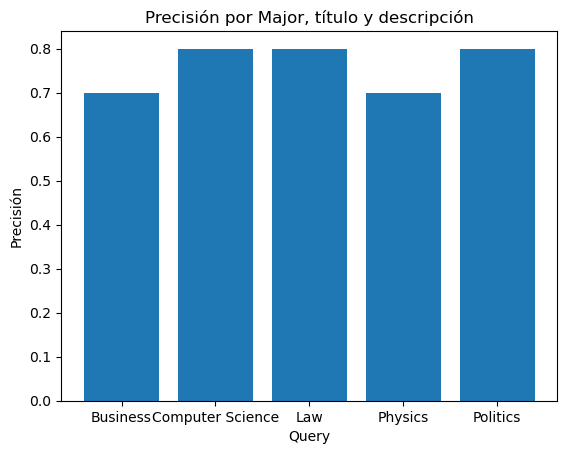

In [139]:
plt.bar(['Business', 'Computer Science', 'Law', 'Physics', 'Politics'], [business_precisions_mtd, computer_science_precisions_mtd, law_precisions_mtd, physics_precisions_mtd, politics_precisions_mtd])
plt.ylabel('Precisión')
plt.xlabel('Query')
plt.title('Precisión por Major, título y descripción')
plt.show()

Como se observa en el gráfico, este modelo (Major + Title + Description) dio resultados consistentes de precisiones entre el 70% y el 80%, esto puede ser debido a que es el que más información acerca de la asignatura tiene a su disposición.

#### Title + Description

In [140]:
df_computer_science_relevants_td = pd.read_csv('computer science_relevants_td.csv')
df_business_relevants_td = pd.read_csv('business_relevants_td.csv')
df_politics_relevants_td = pd.read_csv('politics_relevants_td.csv')
df_physics_relevants_td = pd.read_csv('physics_relevants_td.csv')
df_law_relevants_td = pd.read_csv('law_relevants_td.csv')

In [141]:
computer_science_precisions_td = top_k_precision(len(df_computer_science_relevants_td))
law_precisions_td = top_k_precision(len(df_law_relevants_td))
business_precisions_td = top_k_precision(len(df_business_relevants_td))
politics_precisions_td = top_k_precision(len(df_politics_relevants_td))
physics_precisions_td = top_k_precision(len(df_physics_relevants_td))

In [142]:
print("Business Precision: ", business_precisions_td)
print("Computer Science Precision: ", computer_science_precisions_td)
print("Law Precision: ", law_precisions_td)
print("Physics Precision: ", physics_precisions_td)
print("Politics Precision: ", politics_precisions_td)

Business Precision:  0.7
Computer Science Precision:  0.4
Law Precision:  0.6
Physics Precision:  0.7
Politics Precision:  0.7


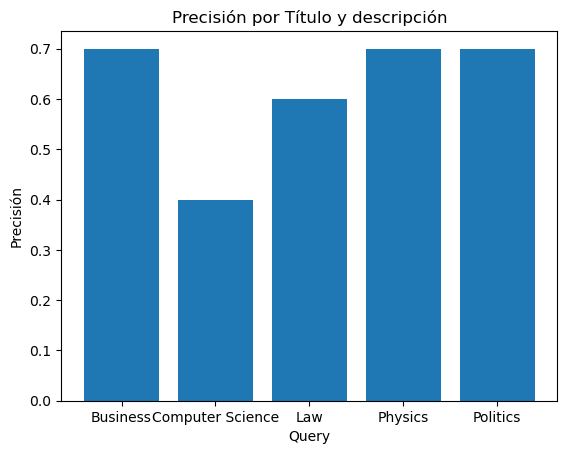

In [143]:
plt.bar(['Business', 'Computer Science', 'Law', 'Physics', 'Politics'], [business_precisions_td, computer_science_precisions_td, law_precisions_td, physics_precisions_td, politics_precisions_td])
plt.ylabel('Precisión')
plt.xlabel('Query')
plt.title('Precisión por Título y descripción')
plt.show()

Mediante este gráfico se puede observar que este modelo (Title + Description) tuvo resultados un tanto inconsistentes. En algunos queries funciono de manera decente, pero en otros no tuvo buenos resultados. Teniando precisiones que varían ente el 40% y el 70%.

#### Major + Description

In [144]:
df_computer_science_relevants_md = pd.read_csv('computer science_relevants_md.csv')
df_business_relevants_md = pd.read_csv('business_relevants_md.csv')
df_politics_relevants_md = pd.read_csv('politics_relevants_md.csv')
df_physics_relevants_md = pd.read_csv('physics_relevants_md.csv')
df_law_relevants_md = pd.read_csv('law_relevants_md.csv')

In [145]:
computer_science_precisions_md = top_k_precision(len(df_computer_science_relevants_md))
law_precisions_md = top_k_precision(len(df_law_relevants_md))
business_precisions_md = top_k_precision(len(df_business_relevants_md))
politics_precisions_md = top_k_precision(len(df_politics_relevants_md))
physics_precisions_md = top_k_precision(len(df_physics_relevants_md))

In [146]:
print("Business Precision: ", business_precisions_md)
print("Computer Science Precision: ", computer_science_precisions_md)
print("Law Precision: ", law_precisions_md)
print("Physics Precision: ", physics_precisions_md)
print("Politics Precision: ", politics_precisions_md)

Business Precision:  0.6
Computer Science Precision:  0.8
Law Precision:  0.9
Physics Precision:  0.6
Politics Precision:  0.7


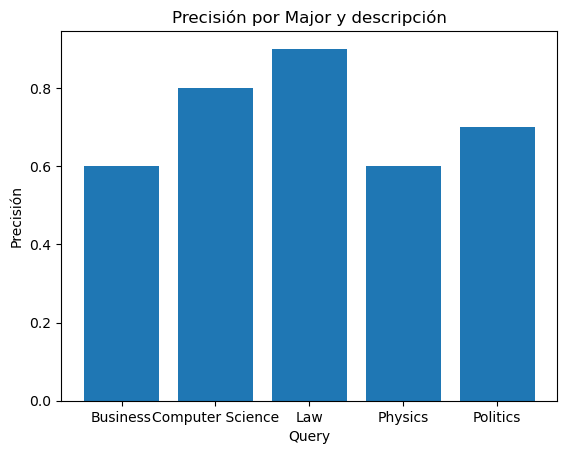

In [147]:
plt.bar(['Business', 'Computer Science', 'Law', 'Physics', 'Politics'], [business_precisions_md, computer_science_precisions_md, law_precisions_md, physics_precisions_md, politics_precisions_md])
plt.ylabel('Precisión')
plt.xlabel('Query')
plt.title('Precisión por Major y descripción')
plt.show()

Como se observa en el gráfico anterior, los resultados de este modelo (Major + Description) fueron un tanto mejores que el modelo anterior, pero no tan consistentes como los del primer modelo (Major + Title + Description). Teniendo precisiones que varían entre el 60% y el 90%.

## Precisión promedio de cada modelo

In [148]:
mtd_avg_presicion = (business_precisions_mtd + computer_science_precisions_mtd + law_precisions_mtd + physics_precisions_mtd + politics_precisions_mtd) / 5
td_avg_presicion = (business_precisions_td + computer_science_precisions_td + law_precisions_td + physics_precisions_td + politics_precisions_td) / 5
md_avg_presicion = (business_precisions_md + computer_science_precisions_md + law_precisions_md + physics_precisions_md + politics_precisions_md) / 5

print("Average Precision MTD: ", mtd_avg_presicion)
print("Average Precision TD: ", td_avg_presicion)
print("Average Precision MD: ", md_avg_presicion)

Average Precision MTD:  0.76
Average Precision TD:  0.6200000000000001
Average Precision MD:  0.72


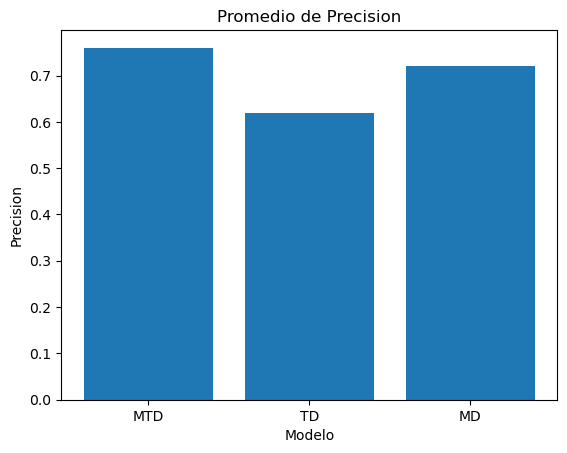

In [149]:
plt.bar(['MTD', 'TD', 'MD'], [mtd_avg_presicion, td_avg_presicion, md_avg_presicion])
plt.ylabel('Precision')
plt.xlabel('Modelo')
plt.title('Promedio de Precision')
plt.show()

Como se ve en la gráfica, el modelo con la mayor precisión promedio es el de Major + Title + Description (MTD). Esto puede ser debido a que al abarcar toda la información posible de una asignatura, puede dar resultados más exactos. Al incluir tanto la carrera (Major), como el título del curso (Title) y la descripción del curso (Description), el modelo tiene acceso a una mayor cantidad de datos relevantes. Esta combinación de información le permite al modelo capturar mejor las características y particularidades de cada asignatura, lo que se traduce en una mayor precisión en sus predicciones. Además, al tener una visión más completa y detallada de cada curso, el modelo puede diferenciar mejor entre asignaturas similares y dar recomendaciones o clasificaciones más precisas. Pero también se debe destacar que esto solamente fue una primera prueba utilizando solo los primeros 10 resultados de cada modelo, futuras pruebas y entrenamientos con una cantidad más amplia de datos podrían dar resultados diferentes.